In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [3]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [4]:
max_features = 1000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
len(input_train[10])

450

In [6]:
input_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [7]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [8]:
input_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
model = Sequential()
# Створення порожньої моделі Sequential

model.add(keras.layers.InputLayer((500,)))


# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 500, 32)        │        32,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,113 (133.25 KB)

 Trainable params: 34,113 (133.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини


Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - acc: 0.5223 - loss: 0.6911 - val_acc: 0.5943 - val_loss: 0.6645
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - acc: 0.6605 - loss: 0.6258 - val_acc: 0.7657 - val_loss: 0.5116
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - acc: 0.7579 - loss: 0.5110 - val_acc: 0.7875 - val_loss: 0.4795
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - acc: 0.8164 - loss: 0.4206 - val_acc: 0.7852 - val_loss: 0.4983
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - acc: 0.8357 - loss: 0.3810 - val_acc: 0.7584 - val_loss: 0.5241


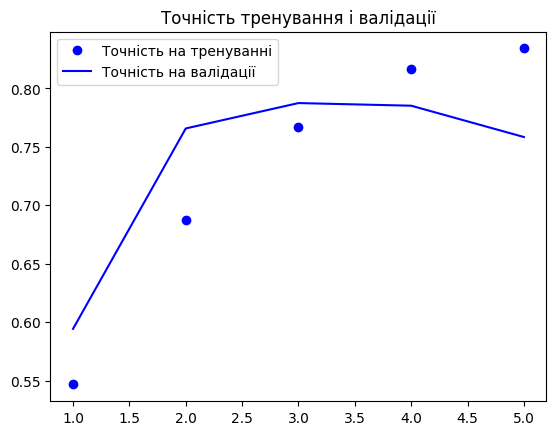

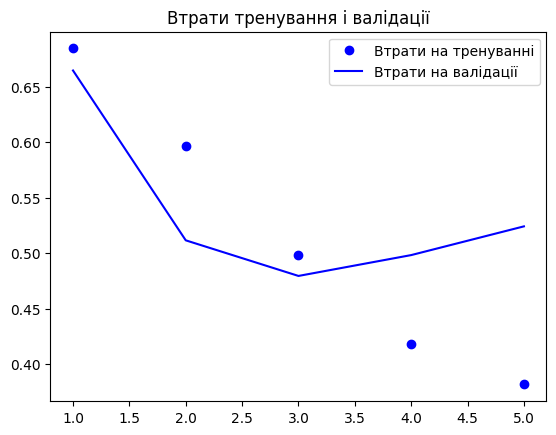

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [20]:
%load_ext tensorboard

import datetime
import tensorflow as tf

log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.fit(input_train[:128], y_train[:128], epochs=50, batch_size=32, callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - acc: 0.5229 - loss: 0.7017
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - acc: 0.6594 - loss: 0.6352
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - acc: 0.8719 - loss: 0.5706
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - acc: 0.9542 - loss: 0.4999
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc: 0.9823 - loss: 0.4316
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.9917 - loss: 0.3793
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - acc: 1.0000 - loss: 0.3003
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - acc: 1.0000 - loss: 0.2598
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc: 1.0000 - loss: 0.2114
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 1.0000 - loss: 0.1670
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - acc: 1.0000 - loss: 0.1621
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step 

In [21]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 13684), started 19:38:48 ago. (Use '!kill 13684' to kill it.)